In [1]:
import pandas

data = pandas.read_json('sample.txt')

In [2]:
the_time = data['ide'].map( lambda x: x['dhEmi']['$date'] )

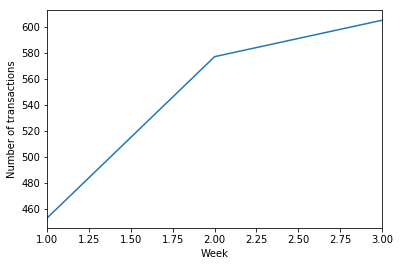

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

t = pandas.to_datetime(the_time)
t.groupby(t.dt.week).count().plot()
plt.xlabel('Week')
plt.ylabel('Number of transactions')

In [4]:
the_items = data['dets'].map( lambda x: {item['prod']['xProd']:item['prod']['vProd'] for item in x} ).tolist()

In [5]:
p = pandas.DataFrame(the_items)
p.describe()

,AGUA,BACARDI,BUFFET,BULE CHA,CAFE EXPRESSO,CAIPIRINHA,CAIPIROSKA,CERVEJA,CERVEJA LATA,CHA,...,SAKE,SASHIMI,SOBREMESA,SUCO,SUSHI ESPECIAL,TEMAKI,URAMAKI,VINHO,WHISKY,YAKISSOBA
count,405.000000,1.0,1635.000000,8.0,20.000000,7.000000,9.000000,91.000000,57.000000,83.000000,...,36.000000,3.000000e+00,16.000000,173.000000,43.000000,14.000000,1.0,1.0,16.00000,3.000000
mean,6.154815,7.0,46.191755,8.2,4.200000,15.428571,17.000000,7.590659,12.584211,1.265060,...,19.997222,2.160000e+01,11.925000,7.711850,18.734884,14.742857,15.0,19.0,19.40000,44.800000
std,4.529104,NaN,29.323780,0.0,1.831019,5.855400,4.974937,6.024104,9.490381,0.645516,...,11.931028,4.351168e-15,5.345091,5.110158,43.625740,4.194816,NaN,NaN,10.79611,2.771281
min,3.500000,7.0,7.680000,8.2,3.500000,12.000000,15.000000,4.500000,6.000000,1.000000,...,15.000000,2.160000e+01,6.000000,4.500000,6.500000,12.000000,15.0,19.0,12.50000,43.200000
25%,3.500000,7.0,26.470000,8.2,3.500000,12.000000,15.000000,4.500000,6.500000,1.000000,...,15.000000,2.160000e+01,8.000000,4.500000,6.500000,12.600000,15.0,19.0,12.50000,43.200000
50%,3.500000,7.0,36.630000,8.2,3.500000,12.000000,15.000000,4.500000,9.800000,1.000000,...,16.000000,2.160000e+01,12.000000,4.500000,9.800000,14.400000,15.0,19.0,12.50000,43.200000
75%,10.500000,7.0,58.510000,8.2,3.500000,18.000000,15.000000,9.000000,13.000000,1.000000,...,20.900000,2.160000e+01,12.000000,11.000000,14.000000,14.400000,15.0,19.0,25.00000,45.600000
max,31.500000,7.0,335.860000,8.2,10.500000,24.000000,30.000000,36.000000,52.000000,4.000000,...,83.600000,2.160000e+01,24.000000,27.000000,295.000000,28.800000,15.0,19.0,45.80000,48.000000
